## 1. Simple Linear Regression
### Perform F test and T Test

### data dan library

In [1]:
import statsmodels.api as sm
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Model

In [4]:
y = tips['tip'] #dependen
x = tips['total_bill'] #independen
x = sm.add_constant(x) #add intercept

In [5]:
model = sm.OLS(y, x) # definisian model
result = model.fit()#fitting model

In [6]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           6.69e-34
Time:                        11:51:33   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

#### Output yang perlu dibaca:
#### 1. R-Square #
#### 2. Prob (F-Statistic) # F-Test
#### 3. Coef masing2 variable # b0 dan b1
#### 4. prob coef masing2 variable # T-test prob dari b0 dan b1

### model: y = 0.9203 + 0.1050x

##### 1. R-Square: 45.7%. Model dapat menjelaskan 45.7% variasi nilai tips, sisannya tidak dapat dijalankan oleh model.

#### 2. Prob (F-Statistic): 6.69e-34 == 0.00000(34x)669 < 0.05. Artinya total bill berpengaruh secara signifikan terhadap tips.

### UJI T
#### 3. - b0 p-value: 0.000... < 0.05. Artinya kita memerlukan intercept dalam model
####     - b1 p-value: 0.000... < 0.05. Artinya total bill berpengaruh secara positif terhadap tips

#### b0 dan b1
#### b0: y = b1x, y saat x = 0. Tips ketika total bill bernilai 0
#### b1: setiap kenaikan 1 dollat pada total bill, tips akan meningkat kira2 sebesar b1 = 0.1050 dollar.

# 2. Multiple Linear Regression

In [7]:
import statsmodels.api as sm
import seaborn as sns

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
y = tips['tip'] #dependen
x = tips[['total_bill', 'size']] # independen
x = sm.add_constant(x) # add constant

In [10]:
model = sm.OLS(y, x) # definisi model
result = model.fit() #fitting model

In [11]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           9.67e-34
Time:                        11:51:33   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

#### Output yang perlu dibaca
#### 1. Adj. R-Square: 46.8%. Artinya model dapat menjelaskan variasi nilai tips sebesar 46.3%. Sisanya dijelaskan oleh variabel lain yang tdiak terdapat dalam model.
#### 2. Prob (F-Statistics): 0.000....967 < 0.05 (tolak h0) Artinya minimal ada salah satu independen variabel (total bill atau size atau keduana) yang berpengaruh terhadap tip.
#### UJI T
#### 3. Prob masing2 beta: b0 b1 b2
#### - Prob b0: 0.001 < 0.05 (tolak h0) artinya model memerlukan intersep.
#### - Prob b1: 0.000 < 0.05 (tolak h0) artinya total bill berpengaruh secara positif trhdp tip.
#### - Prob b2: 0.025 < 0.05 (tolak h0) artinya size berpengaruh secara positif terhadap tip.
#### 4. b0, b1, b2. Tips = 0.6689 + 0.0927 total bill + 0.1926 size
#### - b0: 0.6689 nilai tips saat total bill 0 dan size 0
#### - b1: 0.0927 setiap kenaikan total bill sebesar 1 dollar maka tip akan meningkat kira2 sebesar 0.0927 dollar. Interpretasi b1 untuk total bill hanya berlaku dalam selang 3.07 dollar hingga 50.81 dollar.
#### - b2: 0.1926 setiap kenaikan size sebesar 1 maka tip akan meningkat kira2 sebesar 0.1926 dollar. Interpretasi b2 untuk size hanya berlaku dalam selang 1 orang hingga 6 orang.

##### Nilai interpretasi dilihat dari nilai min dan max masing variable

In [12]:
tips[['total_bill', 'size']].describe()

,total_bill,size
count,244.000000,244.000000
mean,19.785943,2.569672
std,8.902412,0.951100
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.000000
75%,24.127500,3.000000
max,50.810000,6.000000


# 3. Model Diagnostic and Multicollinearity

## Normalitas

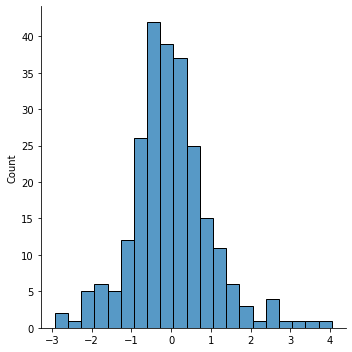

In [13]:
sns.displot(result.resid)

### Terilhat menyebar normal, kita anggap asumsi terpenuhi.

## Asumsi Gaus Markov

#### 1. Rataan error = 0
#### 2. Error tidak saling berkorelasi
#### 3. Homoscedastisitas, ragam error homogen

In [14]:
import matplotlib.pyplot as plt

C:\Users\dheof\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'residual')

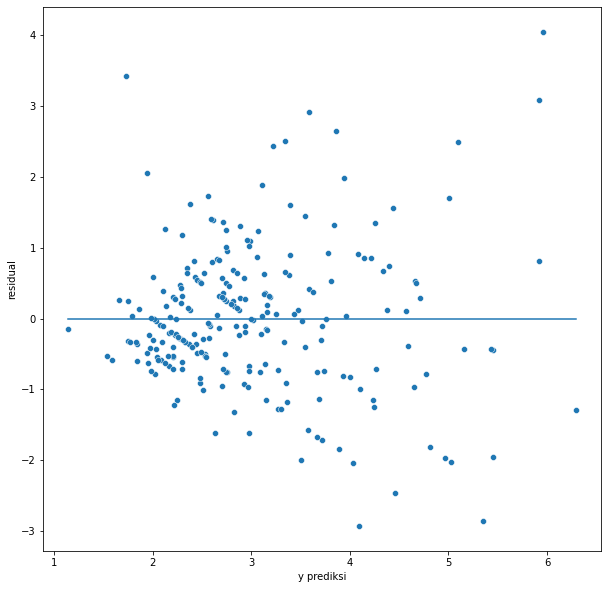

In [16]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = result.fittedvalues, y = result.resid)
sns.lineplot(result.fittedvalues, 0)
plt.xlabel('y prediksi')
plt.ylabel('residual')

#### 1. Rataan error = 0, kita anggap terpenuhi karena error disekitar nilai nol
#### 2. Error tidak saling berkorelasi, kita anggap terpenuhi karena tidak polsa misalkan kuadaratik pola lainnya
#### 3. Homoscedastisitas, ragam error homogen. Terindikasi ada masalah Homoscedatisitas tidak terpenuhi.


### Asumsi Multicollinearity

In [27]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def calc_vif(x):
    
    vif = pd.DataFrame()
    vif['variabel'] = x.columns
    vif['vif'] = [variance_inflation_factor(x.values, i) for i in range (x.shape[1])]
    
    return vif

In [31]:
calc_vif(x.drop(columns = 'const'))

,variabel,vif
0,total_bill,8.684373
1,size,8.684373


#### Ada indikasi masalah multikolineritas karena vif > 4, jika vif > 10 maka akan lebih masalah

### Summary

#### 1. Normalitas. Kita anggap terpenuhi (uji F dan Uji T valid)
#### 2. Gauss-Markov
#### - rataan error = 0. Kita anggap terpenuhi. Nilai betda dan nilai prediksi tidak bias.
#### - error tidak saling berkolerasi. Kita anggap terpenuhi. R-sq serta p value uji T tidak bias
#### - homoscedasitas. Ada indikasi tidak terpenuhi. Hasil prediksi semakin besar nilainya semakin tidak stabil. Solusi penggunaan model lainnya
#### 3. Multikolineritas. Ada indikasi tidak terpenuhi. Tidak terlalu parah. Beta untuk total bill, nilai total bill meningkat sebesar 10 dollar tips aakan meningkat kira2 sebesar 1 dollar dengan catatan variabel lain (size) nilainya tetap. Solusi feature selection ada juga PCA.

# 4. Linear Regression with Dummy Variables 

In [32]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Pembuatan Dummy Variable

In [36]:
x = tips.drop(columns = ['tip'])
y = tips['tip']
x = pd.get_dummies(x, columns = ['sex', 'smoker', 'day', 'time'], drop_first = True)
x = sm.add_constant(x)
x

,const,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,1.0,16.99,2,1,1,0,0,1,1
1,1.0,10.34,3,0,1,0,0,1,1
2,1.0,21.01,3,0,1,0,0,1,1
3,1.0,23.68,2,0,1,0,0,1,1
4,1.0,24.59,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,1.0,29.03,3,0,1,0,1,0,1
240,1.0,27.18,2,1,0,0,1,0,1
241,1.0,22.67,2,0,0,0,1,0,1
242,1.0,17.82,2,0,1,0,1,0,1


In [37]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

## Model

In [39]:
# y x

model = sm.OLS(y, x)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     26.06
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.20e-28
Time:                        12:32:29   Log-Likelihood:                -347.48
No. Observations:                 244   AIC:                             713.0
Df Residuals:                     235   BIC:                             744.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.5908      0.256      2.310      

### Output yang perlu dibaca
#### 1. Ads R-Square
#### 2. Prob (F-Statistics) 0.00.....12
#### 3. Prob (T-Statistics) 
#### - b0: 0.022
#### - b1: 0.000
#### - b2: 0.051
#### - b3: 0.819
#### - b4: 0.556
#### - b5: 0.680
#### - b6: 0.931
#### - b7: 0.772
#### - b8: 0.878
#### 4. Coef b0 .... b8, model : tips = 0.5908 + 0.0945 total_bill + 0.176 size + .......... - 0.0681 time_dinner
#### - b0: 0.5908 nilai tips ketika total bill dll bernilai 0
#### - b1: 0.0945, ketika total bill naik 1 dollar maka tips bertambah 0.0945
#### - b2
#### - .....
